In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -qo '/content/drive/MyDrive/my_model.zip' -d '/content/drive/MyDrive/model/'

Mounted at /content/drive


In [ ]:
!pip install fastapi # Установим FastAPI
!pip install uvicorn # Установим ASGI-сервер
!pip install python-multipart # Необходимая зависимость для FastAPI (для работы с данными отправленных форм на сайте)
!pip install requests

In [ ]:
%%writefile main.py
from fastapi import FastAPI, UploadFile
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from zipfile import ZipFile
import os
import gdown
from PIL import Image
from io import BytesIO
import requests
from json import *

app = FastAPI()

@app.post("/api/predict")
async def predict(file: UploadFile):

    model = tf.keras.models.load_model('/content/drive/MyDrive/model/my_model')

    image_size = (150, 150)
    img = Image.open(BytesIO(await file.read()))
    img = img.resize(image_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = int(np.argmax(predictions[0]))

    categories = ['Кошка', 'Собака']

    prediction = categories[score]
    result = {"score": score, "prediction": prediction}

    return result

Overwriting main.py


In [ ]:
!nohup uvicorn main:app --reload &

nohup: appending output to 'nohup.out'


In [ ]:
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [689] using WatchFiles
2024-06-02 10:18:09.836001: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 10:18:09.836065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 10:18:09.837680: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-02 10:18:09.846198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance

In [ ]:
import requests
import json
url = "http://127.0.0.1:8000/api/predict"
#!wget https://i.pinimg.com/736x/6b/3a/4c/6b3a4c32659711d333e7e3b0089ef8cc.jpg
TEST_IMG='/content/6b3a4c32659711d333e7e3b0089ef8cc.jpg'

response = requests.post(
    url,
    files={"file": open(TEST_IMG, "rb")},
)
if response.status_code == 200:
    try:
        r = response.json()
    except ValueError:
        print("Содержимое ответа не является допустимым JSON")
else:
    print(f"Запрос не удался с кодом статуса {response.status_code}")

print('На изображении ', r['prediction'])

На изображении  Собака


Картинка собаки

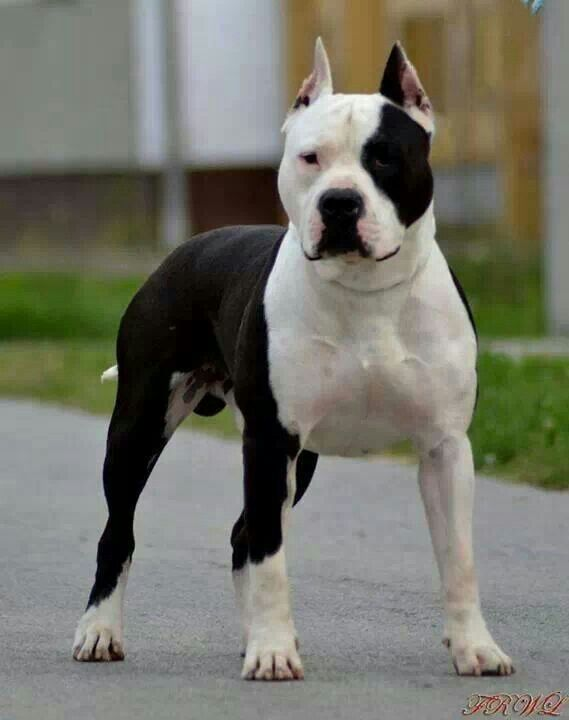

In [ ]:
import requests
import json
url = "http://127.0.0.1:8000/api/predict"
#!wget https://img.freepik.com/free-photo/the-red-or-white-cat-i-on-white-studio_155003-13189.jpg
TEST_IMG='/content/the-red-or-white-cat-i-on-white-studio_155003-13189.jpg'

response = requests.post(
    url,
    files={"file": open(TEST_IMG, "rb")},
)
if response.status_code == 200:
    try:
        r = response.json()
    except ValueError:
        print("Содержимое ответа не является допустимым JSON")
else:
    print(f"Запрос не удался с кодом статуса {response.status_code}")

print('На изображении ', r['prediction'])

--2024-06-02 10:48:08--  https://img.freepik.com/free-photo/the-red-or-white-cat-i-on-white-studio_155003-13189.jpg
Resolving img.freepik.com (img.freepik.com)... 23.215.0.45, 23.215.0.48, 2600:1408:5400:5::170c:9031, ...
Connecting to img.freepik.com (img.freepik.com)|23.215.0.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38418 (38K) [image/jpeg]
Saving to: ‘the-red-or-white-cat-i-on-white-studio_155003-13189.jpg’

the-red-or-white-ca 100%[===================>]  37.52K  --.-KB/s    in 0.002s  

2024-06-02 10:48:08 (20.1 MB/s) - ‘the-red-or-white-cat-i-on-white-studio_155003-13189.jpg’ saved [38418/38418]

На изображении  Кошка


Картинка кошки

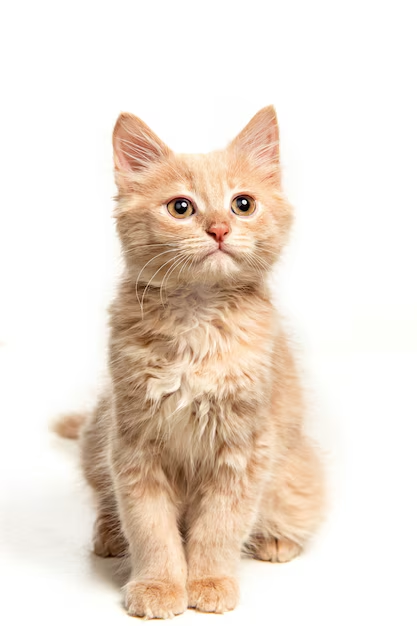